In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


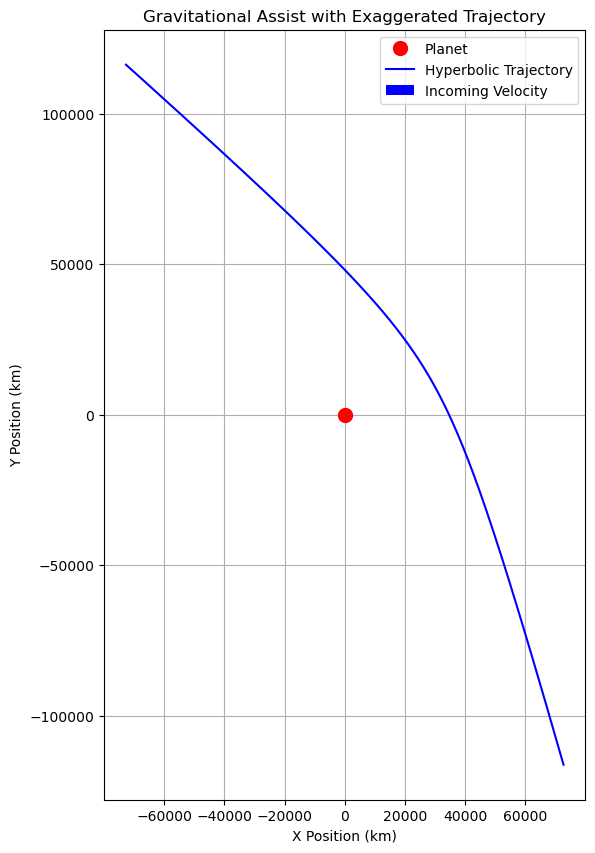

In [14]:
def gravitational_assist_trajectory(mu_planet, v_in_spacecraft, v_planet, r_closest, exaggeration=1):

    # Calculate velocity of rocket relative to planet
    v_in_planet = v_in_spacecraft - v_planet
    v_in_magnitude = np.linalg.norm(v_in_planet)

    # Calculate deflection angle
    deflection_angle = 2 * math.asin(1 / (1 + (r_closest * v_in_magnitude**2) / mu_planet))

    # Outgoing velocity 
    rotation_matrix = np.array([
        [math.cos(deflection_angle), -math.sin(deflection_angle), 0],
        [math.sin(deflection_angle),  math.cos(deflection_angle), 0],
        [0, 0, 1]
    ])
    v_out_planet = np.dot(rotation_matrix, v_in_planet)

    v_out_sun = v_out_planet + v_planet

    # Semi major axis
    a_hyperbola = -mu_planet / (v_in_magnitude**2 / 2 - mu_planet / r_closest)

    # Eccentricity
    e_hyperbola = 1 + r_closest * v_in_magnitude**2 / mu_planet
    theta = np.linspace(-np.pi / 2, np.pi / 2, 500)

    # trajectory (with theta)
    r_trajectory = a_hyperbola * (1 - e_hyperbola**2) / (1 + e_hyperbola * np.cos(theta))

    x_trajectory = r_trajectory * np.cos(theta)
    y_trajectory = r_trajectory * np.sin(theta)

    # Rotate trajectory by the angle
    angle_incoming = math.atan2(v_in_planet[1], v_in_planet[0])
    rotation_matrix_incoming = np.array([
        [math.cos(angle_incoming), -math.sin(angle_incoming)],
        [math.sin(angle_incoming),  math.cos(angle_incoming)]
    ])
    trajectory_rotated = np.dot(rotation_matrix_incoming, np.vstack((x_trajectory, y_trajectory)))

    # Exajerate rotation for vis
    trajectory_rotated *= exaggeration

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', 'box')
    ax.plot(0, 0, 'ro', markersize=10, label="Planet")
    ax.plot(trajectory_rotated[0], trajectory_rotated[1], 'b-', label="Hyperbolic Trajectory")
    ax.quiver(0, 0, v_in_planet[0], v_in_planet[1], color="blue", angles="xy", scale_units="xy", scale=1, label="Incoming Velocity")

    # Add labels and legend
    ax.set_title("Gravitational Assist with Exaggerated Trajectory")
    ax.set_xlabel("X Position (km)")
    ax.set_ylabel("Y Position (km)")
    ax.legend()
    ax.grid(True)

    plt.show()

    return deflection_angle, v_out_sun
    
# Graph deflection angle
mu_mars = 42913.2
v_in_spacecraft = np.array([15, 0, 0])
v_planet = np.array([-1, -10, 0])
r_closest = 300
exaggeration = 10

deflection_angle, v_out_sun = gravitational_assist_trajectory(mu_mars, v_in_spacecraft, v_planet, r_closest, exaggeration)


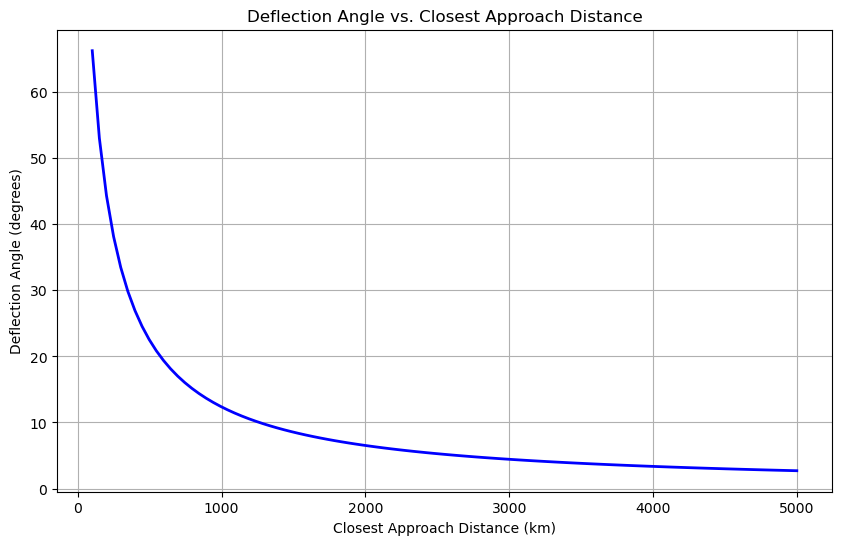

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

def gravitational_assist(mu_planet, v_in_spacecraft, v_planet, r_closest):

    # Calculate velocity of spacecraft relative to the planet
    v_in_planet = v_in_spacecraft - v_planet
    v_in_magnitude = np.linalg.norm(v_in_planet)

    # Calculate deflection angle
    deflection_angle = 2 * math.asin(1 / (1 + (r_closest * v_in_magnitude**2) / mu_planet))
    
    return deflection_angle

mu_mars = 42913.2  
v_in_spacecraft = np.array([15, 0, 0])  
v_planet = np.array([-1, -10, 0])  

# Range of closest approach distances
r_closest_values = np.linspace(100, 5000, 100)  # From 100 km to 5000 km
deflection_angles = [gravitational_assist(mu_mars, v_in_spacecraft, v_planet, r) for r in r_closest_values]

deflection_angles_deg = np.degrees(deflection_angles)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_closest_values, deflection_angles_deg, 'b-', linewidth=2)
plt.xlabel("Closest Approach Distance (km)")
plt.ylabel("Deflection Angle (degrees)")
plt.title("Deflection Angle vs. Closest Approach Distance")
plt.grid(True)
plt.show()


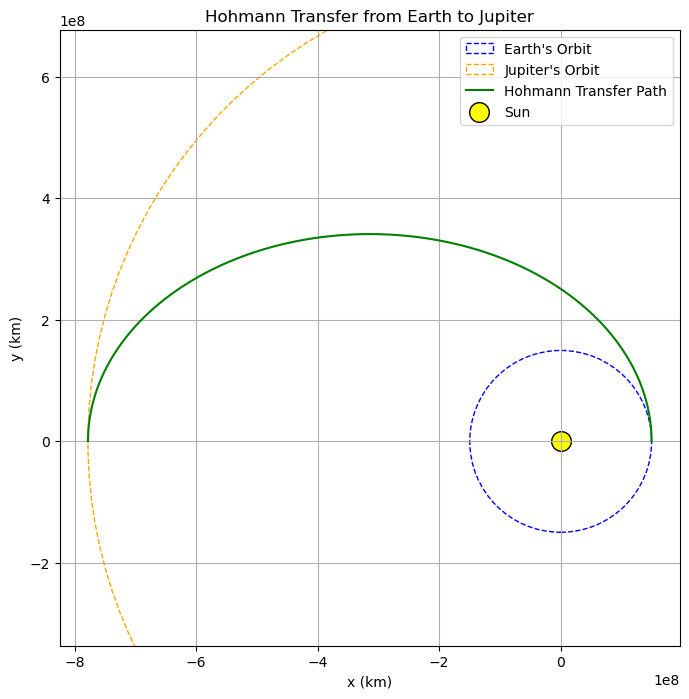

In [10]:
# Constants
AU = 1.496e+8
mu = 1.327e+11
r_earth = 1 * AU
r_jupiter = 5.2 * AU

# Calculate oribtal param of transfer elipse
a_transfer = (r_earth + r_jupiter) / 2
e_transfer = (r_jupiter - r_earth) / (r_jupiter + r_earth)
T_transfer = 2 * np.pi * np.sqrt(a_transfer**3 / mu)
t_transfer = T_transfer / 2

# Calculate velocities
v_earth = np.sqrt(mu/r_earth)
v_jupiter = np.sqrt(mu/r_jupiter)

# Velocity and first and second burn (first and second orbit)
v_periapsis = np.sqrt(mu * ((2/r_earth) - (1/a_transfer)))
delta_v1 = v_periapsis - v_earth

v_apoapsis = np.sqrt(mu * ((2/r_jupiter) - (1/a_transfer)))
delta_v2 = v_apoapsis - v_jupiter

total_delta_v = delta_v1 + delta_v2

# Calcualte path 
theta = np.linspace(0, np.pi, 500)
r_transfer = (a_transfer * (1 - e_transfer **2)) / (1 + e_transfer * np.cos(theta))

x_transfer = r_transfer * np.cos(theta)
y_transfer = r_transfer * np.sin(theta)

# Plots
plt.figure(figsize=(8, 8))
earth_orbit = plt.Circle((0, 0), r_earth, color='blue', fill=False, linestyle='--', label="Earth's Orbit")
plt.gca().add_artist(earth_orbit)
jupiter_orbit = plt.Circle((0, 0), r_jupiter, color='orange', fill=False, linestyle='--', label="Jupiter's Orbit")
plt.gca().add_artist(jupiter_orbit)
plt.plot(x_transfer, y_transfer, color='green', label='Hohmann Transfer Path')
plt.scatter(0, 0, color='yellow', label='Sun', s=200, edgecolor='black')
plt.axis('equal')
plt.title('Hohmann Transfer from Earth to Jupiter')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.legend()
plt.grid()
plt.show()
